In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
! pip install ipywidgets 
! pip install tensorflow==2.17.0

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1


In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

tf.__version__

'2.17.1'

In [9]:
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.NLEKDM_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.NLEKDM_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [10]:

data_itr = ds.as_numpy_iterator()
data_itr.next()['label']

2

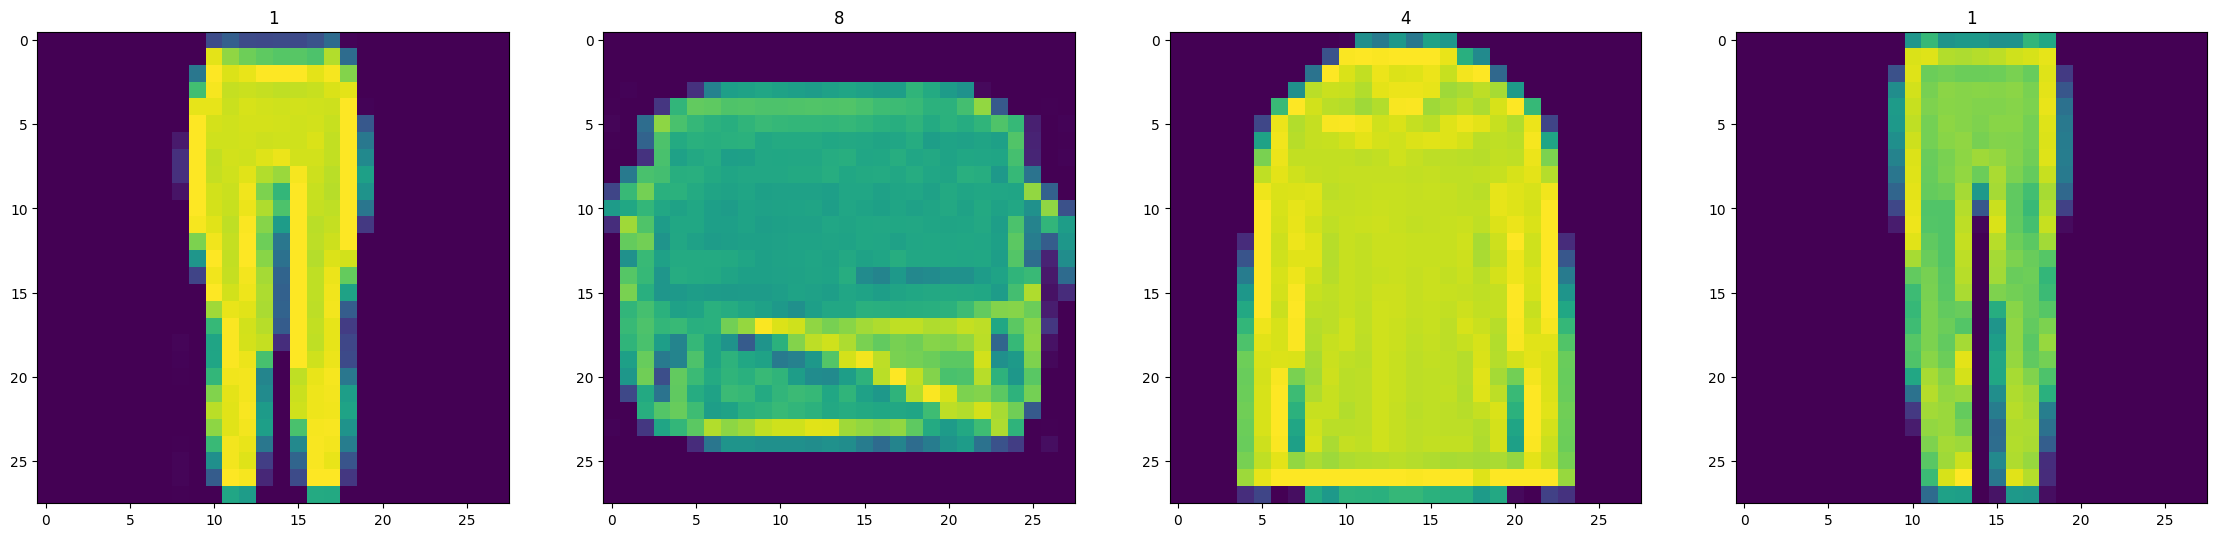

In [11]:
fig, ax = plt.subplots(ncols=4,figsize=(28,28,))
for idx in range(4):
    batch = data_itr.next()
    ax[idx].imshow(np.squeeze(batch['image']))
    ax[idx].title.set_text(batch['label'])

In [12]:
def scale_image(data):
    image = data['image']
    return image/255

ds = tfds.load('fashion_mnist',split = 'train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Reshape, LeakyReLU, Dropout, UpSampling2D

In [14]:
def build_generator():
    model = Sequential()
    # 128, (28,28,1)
    # Takes random values and reshapes it to 7,7,128
    # Beginings of a generated image
    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling block
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv layer to get one channel
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

    
    return model


In [15]:
generator = build_generator()
generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
image = generator.predict(np.random.randn(4,128,1))
image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(4, 28, 28, 1)

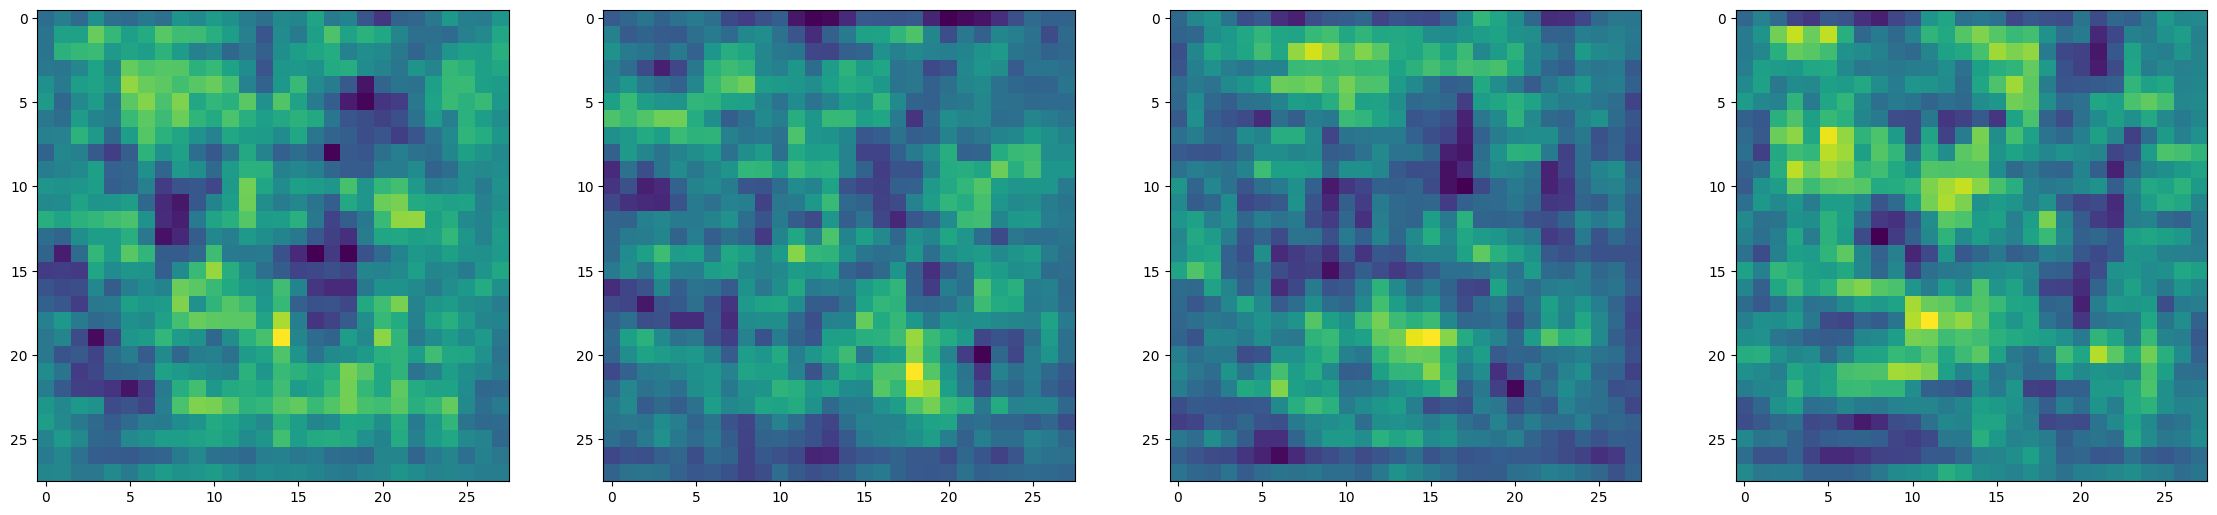

In [17]:
fig, ax = plt.subplots(ncols=4,figsize=(28,28,))
for idx, img in enumerate(image):
    ax[idx].imshow(np.squeeze(img))

In [18]:
# Building a discriminator
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten and pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    # 1-> false 0-> true
    model.add(Dense(1,activation='sigmoid'))
    
    return model

In [19]:
discriminator = build_discriminator()
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
discriminator.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


array([[0.49929526],
       [0.4991316 ],
       [0.4990979 ],
       [0.4991434 ]], dtype=float32)

### CUSTOM TRAINING LOOP

In [21]:
# Optimizer and loss for both
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [22]:
g_opt = Adam(learning_rate= 0.0001)
d_opt = Adam(learning_rate= 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### Building Sub-class Model

In [23]:
# importing base-model class
from tensorflow.keras.models import Model

In [24]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Create attributes for gen and discriminator
        self.generator = generator
        self.discriminator = discriminator
        
    def train_step(self, batch):
        # Get data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128)),training=False)

        # Train discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to discriminator
            yhat_real = self.discriminator(real_images,training=True)        
            yhat_fake = self.discriminator(fake_images,training=True) 
            yhat_realfake = tf.concat([yhat_real, yhat_fake],axis=0)
            
            # Create lables for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)], axis=0)

            # Adding Noise
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = 0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss
            total_d_loss = self.d_loss(y_realfake,yhat_realfake)
            
        
        # Apply backpropgation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128)), training=True)
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
            # Calculate loss
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

        # Apply the backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))


        return {"d_loss": total_d_loss, "g_loss": total_g_loss}
            
        
    def test_step(self):
        pass
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args,**kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

In [25]:
fashionGAN = FashionGAN(generator, discriminator)

In [26]:
fashionGAN.compile(g_opt, d_opt, g_loss, d_loss)

In [27]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [28]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))

In [29]:
# Recommended 2000 epochs
hist = fashionGAN.fit(ds, epochs=100, callbacks=[ModelMonitor()])

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 141ms/step - d_loss: 0.5199 - g_loss: 1.2196
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 120ms/step - d_loss: 0.5086 - g_loss: 2.9026
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.7007 - g_loss: 0.7117
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.6962 - g_loss: 0.7341
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.6873 - g_loss: 0.7603
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.6829 - g_loss: 0.7844
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.6778 - g_loss: 0.8029
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.6801 - g_loss: 0.7778
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.6826 - g_loss: 0.7821
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.6851 - g_loss: 0.7630
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.6860 - g_loss: 0.7637
Epoch 12

In [47]:
generator.save('generator.keras')
discriminator.save('discriminator.keras')

(1, 28, 28, 1)


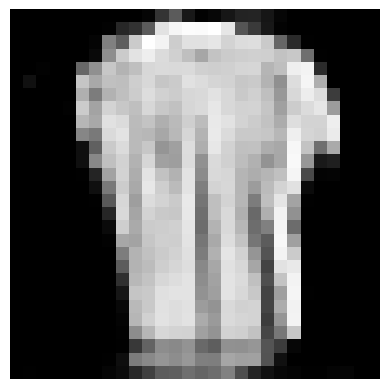

In [46]:
noise = tf.random.normal([1, 128, 1]) 
generated_image = generator(noise, training=False)
print(generated_image.shape)
plt.imshow(generated_image.numpy().squeeze(), cmap='gray')  # Use 'gray' for grayscale images
plt.axis('off')
plt.show()

In [30]:
import os

# Define the directory path
dir_path = "/kaggle/working/images"

# Create the directory
os.makedirs(dir_path, exist_ok=True)
# Verify creation
print("Directory created:", os.path.exists(dir_path))


Directory created: True
